In [52]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [53]:
def dist_points(x1,x2):
    """
    This is the Euclidean Distance
    """
    import numpy as np
    return np.sqrt(np.sum((x1 - x2)**2))

def dist_clusters(c1,c2, dist = dist_points):
    """
    This is average distance between clusters
    """
    d = 0
    for p1 in c1:
        for p2 in c2:
            d = d + dist(p1,p2)
    return d/(len(c1)*len(c2))

def compute_distance_matrix(clusters, 
                            dist_c = dist_clusters, 
                            dist_p=dist_points):
    nb_clusters = len(clusters)
    M = np.zeros((nb_clusters,nb_clusters))
    for i,ci in enumerate(clusters):
        for j,cj in enumerate(clusters):
            M[i,j] = dist_c(ci,cj,dist_p)
    return M


(15, 2)


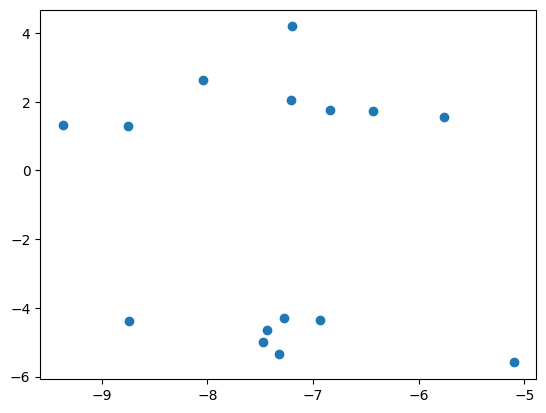

In [54]:
## Kmeans
X, y = make_blobs(centers=2,random_state=43,n_samples=15)
plt.scatter(X[:,0],X[:,1])
[N,d]= X.shape
print(X.shape)

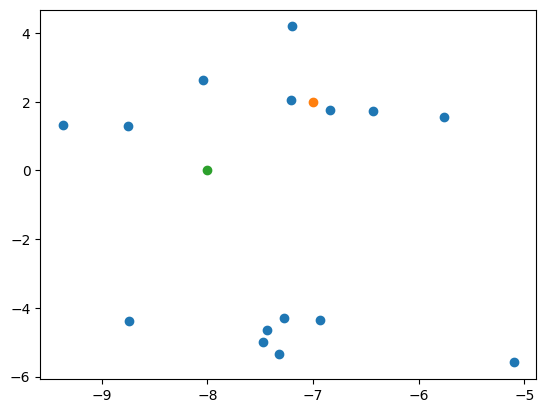

In [55]:
# I fix the gravity centers
mu_1 = np.array([-7,2]) 
mu_2 = np.array([-8,0])

plt.scatter(X[:,0],X[:,1])
plt.scatter(mu_1[0],mu_1[1])
plt.scatter(mu_2[0],mu_2[1])

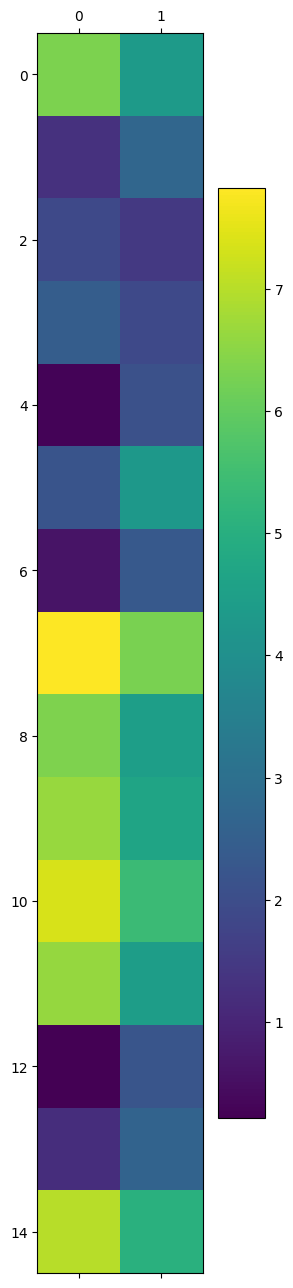

In [56]:
# we compute the distance between points and mu_k
def compute_dist_gravitycenters(X,gravity_centers):
    [N,d] = X.shape 
    M = np.zeros((N,2))
    for i,p in enumerate(X):
        for j,cg in enumerate(gravity_centers):
            M[i,j] = dist_points(p,cg)
    return M
M=compute_dist_gravitycenters(X, [mu_1,mu_2])
plt.matshow(M)
plt.colorbar()


In [57]:
def assign(X,M):
    clusters = []
    for i,p in enumerate(X):
        #find the lowest value in M[i,:]
        cluster_for_point_i = np.argmin(M[i,:])
        clusters.append(cluster_for_point_i)
    return clusters

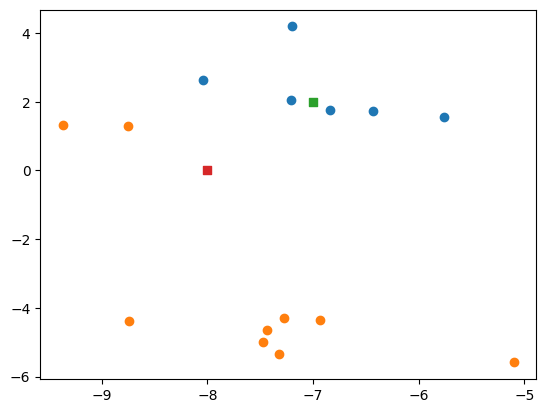

In [58]:
clusters = assign(X,M)
for i in np.unique(clusters):
    plt.scatter(X[np.where(clusters==i),0],X[np.where(clusters==i),1])

plt.scatter(mu_1[0],mu_1[1],marker="s")
plt.scatter(mu_2[0],mu_2[1],marker="s")

In [59]:
def compute_new_gravity_centers(X,clusters):
    new_mu_1 = np.array([0,0])
    new_mu_2 = np.array([0,0])
    n1,n2 = 0,0
    for p,c in zip(X,clusters):
        if c == 0:
            new_mu_1 = new_mu_1 + p
            n1 = n1 + 1
        else:
            new_mu_2 = new_mu_2 + p
            n2 = n2 + 1
    new_mu_1 = new_mu_1/n1
    new_mu_2 = new_mu_2/n2
    return new_mu_1,new_mu_2
compute_new_gravity_centers(X,clusters)

(array([-6.91545322,  2.32642046]), array([-7.59988612, -3.44382426]))

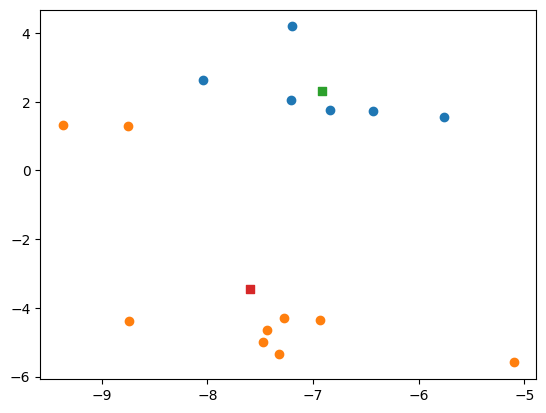

In [60]:
for i in np.unique(clusters):
    plt.scatter(X[np.where(clusters==i),0],X[np.where(clusters==i),1])
new_mu_1,new_mu_2=compute_new_gravity_centers(X,clusters)
plt.scatter(new_mu_1[0],new_mu_1[1],marker="s")
plt.scatter(new_mu_2[0],new_mu_2[1],marker="s")

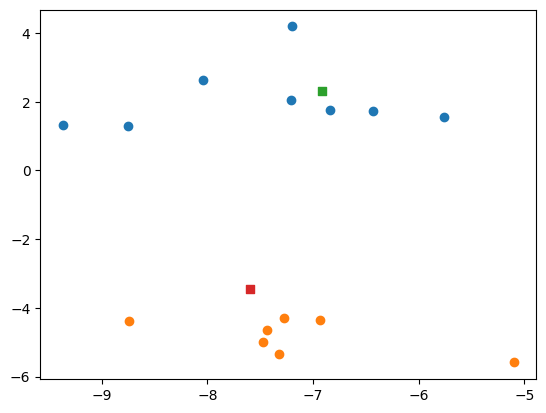

In [61]:
M=compute_dist_gravitycenters(X, [new_mu_1,new_mu_2])

clusters_new = assign(X,M)
for i in np.unique(clusters_new):
    plt.scatter(X[np.where(clusters_new==i),0],X[np.where(clusters_new==i),1])

plt.scatter(new_mu_1[0],new_mu_1[1],marker="s")
plt.scatter(new_mu_2[0],new_mu_2[1],marker="s")

In [62]:
def intra_class_inertia(X,clusters, gravity_centers):
    Jw = 0
    for p,c in zip(X,clusters):
        Jw = Jw + dist_points(p,gravity_centers[c])**2
    return Jw
Jw = intra_class_inertia(X,clusters_new,[new_mu_1,new_mu_2])
print(Jw)
new_new_mu_1, new_new_mu_2 = compute_new_gravity_centers(X,clusters_new)
Jw = intra_class_inertia(X,clusters_new,[new_new_mu_1,new_new_mu_2])
print(Jw)


42.0427410798661
25.12744269153167


In [63]:
old_Jw = intra_class_inertia(X,clusters,[mu_1,mu_2])

In [64]:
print(old_Jw)

189.00705573324703


In [65]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init='random', n_init=1);
model.fit(X)

,n_clusters,2
,init,'random'
,n_init,1
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


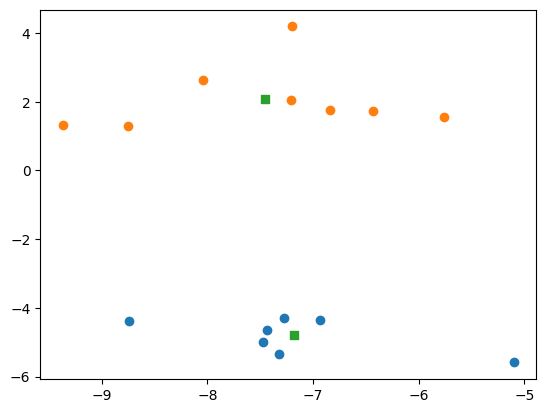

In [66]:
for i in np.unique(model.labels_):
    plt.scatter(X[np.where(model.labels_==i),0],
                X[np.where(model.labels_==i),1])

plt.scatter(model.cluster_centers_[:,0],
            model.cluster_centers_[:,1],marker="s")


In [67]:
model.inertia_

25.12744269153167

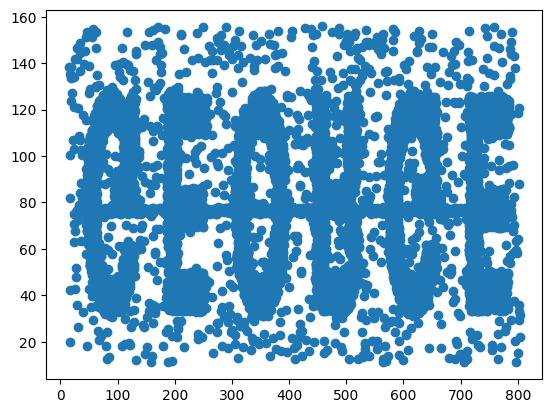

In [76]:
my_X = np.loadtxt("Kmeans data/george.dat")
plt.scatter(my_X[:,0],my_X[:,1])

In [69]:
[N,d] = my_X.shape

In [82]:
K = 100
model = KMeans(n_clusters=K,init='k-means++', n_init=10)
model.fit(my_X)

,n_clusters,100
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


775762.1383404387


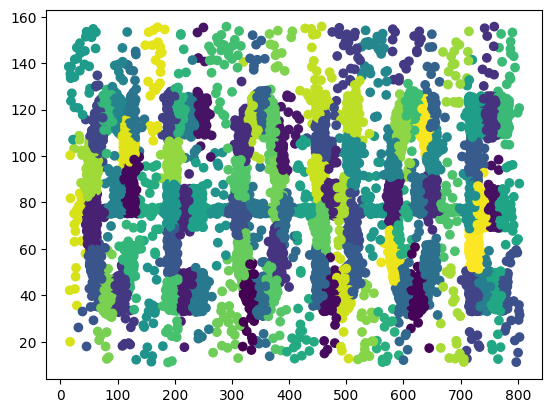

In [83]:
plt.scatter(my_X[:,0],my_X[:,1],c=model.labels_)
print(model.inertia_)

In [84]:
13956364.460801944
22020004.246987127

22020004.246987127

In [85]:
from sklearn.metrics import silhouette_score
scores = []
for K in range(2,15):
    model = KMeans(n_clusters=K,init='random', n_init=10)
    model.fit(my_X)
    score = silhouette_score(my_X,model.labels_)
    scores.append(score)
    print(f"Score for K = {K} : {score}")
    

Score for K = 2 : 0.612008539591523
Score for K = 3 : 0.5809858698046819
Score for K = 4 : 0.5077132882800319
Score for K = 5 : 0.5052685966432697
Score for K = 6 : 0.5517105130024682
Score for K = 7 : 0.5085244591684032
Score for K = 8 : 0.4716696679079759
Score for K = 9 : 0.440274392942814
Score for K = 10 : 0.4063255326203774
Score for K = 11 : 0.3902941877104318
Score for K = 12 : 0.44717581131177025
Score for K = 13 : 0.45057704947040805
Score for K = 14 : 0.3995379003231777


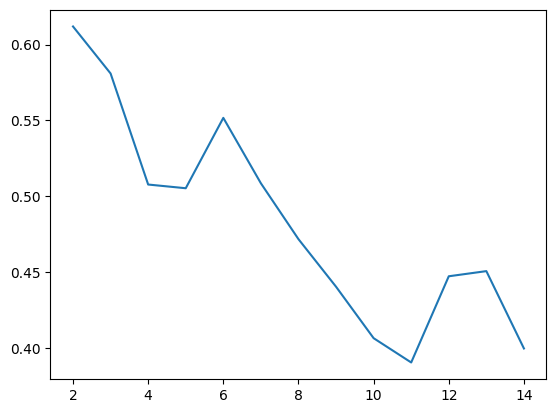

In [86]:
plt.plot(range(2,15),scores)